In [ ]:
import pandas as pd
import numpy as np

In [2]:
from gprofiler import GProfiler
gp = GProfiler(return_dataframe=True)

# IO

In [3]:
import PineBioML.IO as IO

In [4]:
# Path
input_folder = "./input/"
output_folder = "./output/"
export_title = "example_ccRCC_proteomics "

The data is from  [LinkedOmicsKB](https://kb.linkedomics.org/).

In [5]:
##### Read data method 2: read several files at once
x, group_label = IO.read_multiple_groups(
    [
        input_folder +
        "CCRCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Normal.txt",
        input_folder +
        "CCRCC_proteomics_gene_abundance_log2_reference_intensity_normalized_Tumor.txt"
    ],
    index_col=0,
    transpose=True  # Set True to transpose data before merging
)

y = group_label

In [6]:
x.head(5)

idx,ENSG00000000003.15,ENSG00000000419.12,ENSG00000000457.14,ENSG00000000938.13,ENSG00000000971.16,ENSG00000001036.14,ENSG00000001084.13,ENSG00000001167.14,ENSG00000001461.17,ENSG00000001497.16,...,ENSG00000168701.19,ENSG00000181631.7,ENSG00000185046.18,ENSG00000187626.9,ENSG00000197580.13,ENSG00000205060.11,ENSG00000211645.2,ENSG00000218336.9,ENSG00000230667.5,ENSG00000243232.6
0,23.910682,25.408087,20.530891,18.652968,27.897499,25.799120,25.559402,18.816175,NaN,23.234695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23.465741,25.284497,20.781890,19.239574,27.379201,25.720201,25.609840,19.186315,NaN,23.153964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23.688758,24.950765,20.792161,19.915342,28.317880,25.268082,25.164925,20.709017,NaN,23.627795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.753836,25.238511,20.878394,19.312896,28.491202,25.647752,25.857748,19.940423,NaN,23.216209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23.545379,25.241886,20.826577,NaN,28.192978,26.344376,25.673238,19.899800,20.191294,23.256864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
y.head(5)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
dtype: float64

# Preprocessing

In [8]:
# Convert ENSEMBL ID to gene symbol by gprofiler
x.columns = [col.split(".")[0] for col in x.columns]
gene_name = gp.convert(query=x.columns.to_list())["name"]

# For those who can't find a gene symbol, they will remain in ENSEMBL ID
matched = gene_name == "None"
x.columns = x.columns.where(matched, gene_name)

# The result
x.head(5)

,TSPAN6,DPM1,SCYL3,FGR,CFH,FUCA2,GCLC,NFYA,NIPAL3,LAS1L,...,TMEM208,P2RY13,ANKS1B,ZKSCAN4,BCO2,SLC35B4,IGLV1-50,TENM3,SETSIP,PCDHAC2
0,23.910682,25.408087,20.530891,18.652968,27.897499,25.799120,25.559402,18.816175,NaN,23.234695,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,23.465741,25.284497,20.781890,19.239574,27.379201,25.720201,25.609840,19.186315,NaN,23.153964,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,23.688758,24.950765,20.792161,19.915342,28.317880,25.268082,25.164925,20.709017,NaN,23.627795,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,23.753836,25.238511,20.878394,19.312896,28.491202,25.647752,25.857748,19.940423,NaN,23.216209,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,23.545379,25.241886,20.826577,NaN,28.192978,26.344376,25.673238,19.899800,20.191294,23.256864,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
### Revert to Original scale
x = np.power(2, x)

In [10]:
# Impute 0
from PineBioML.preprocessing import impute

# The imputer will drop the features with missing value more than 50%.
# Remaining will be filled by 0.
simple = impute.simple_imputer(threshold = 0.5, strategy = "constant")
x = simple.fit_transform(x, y)

# retsult
x.head(5)

,TSPAN6,DPM1,SCYL3,FGR,CFH,FUCA2,GCLC,NFYA,LAS1L,ENPP4,...,IGHV1-69D,PAGR1,IGHV3-64D,IGHV5-10-1,IQCJ-SCHIP1,SCO2,MIURF,ENSG00000285723,ASDURF,DERPC
0,1.577003e+07,4.452421e+07,1.515005e+06,412195.029998,2.500253e+08,5.838602e+07,4.944778e+07,4.615653e+05,9.870520e+06,1.927286e+07,...,4.171632e+05,0.000000e+00,1.132988e+07,1.307512e+07,500761.839790,4.856449e+07,2.976494e+06,7.616187e+06,1.606048e+06,7.998814e+06
1,1.158489e+07,4.086881e+07,1.802902e+06,618997.312051,1.745664e+08,5.527797e+07,5.120709e+07,5.965628e+05,9.333354e+06,1.975832e+07,...,7.009272e+05,0.000000e+00,9.995554e+06,8.901724e+06,519397.129831,4.426385e+07,3.111857e+06,8.900577e+06,1.493852e+06,8.444307e+06
2,1.352156e+07,3.242864e+07,1.815784e+06,988815.550948,3.346041e+08,4.040644e+07,3.761815e+07,1.714096e+06,1.296209e+07,1.598119e+07,...,1.068798e+06,0.000000e+00,2.254598e+07,4.585925e+06,616126.588622,2.625604e+07,2.515705e+06,5.260971e+06,1.561090e+06,9.395700e+06
3,1.414546e+07,3.958667e+07,1.927626e+06,651269.819153,3.773170e+08,5.257057e+07,6.080757e+07,1.006156e+06,9.744856e+06,2.420615e+07,...,9.472778e+05,0.000000e+00,1.660177e+07,2.142705e+07,482998.878520,4.568375e+07,3.245089e+06,8.697766e+06,1.307165e+06,9.058640e+06
4,1.224236e+07,3.967937e+07,1.859621e+06,0.000000,3.068542e+08,8.520154e+07,5.350751e+07,9.782205e+05,1.002337e+07,1.740495e+07,...,0.000000e+00,1.214560e+06,2.384113e+07,3.265534e+07,767109.170522,5.551350e+07,4.141263e+06,1.055341e+07,1.316724e+06,8.411947e+06


In [11]:
# make a copy for volcanal plot
x_copy = x.copy()

In [12]:
from PineBioML.preprocessing import Normalizer
### within sample normalization
x = Normalizer(method = "Normalizer").fit_transform(x)

### standarization
x = (x-x.mean())/x.std()

from PineBioML.report.utils import data_overview

data_overview(x, y, label_name = "ccRCC tissue", title = "Example ccRCC Proteomics")

# Feature selection

In [13]:
from PineBioML.selection.Volcano import Volcano_selection

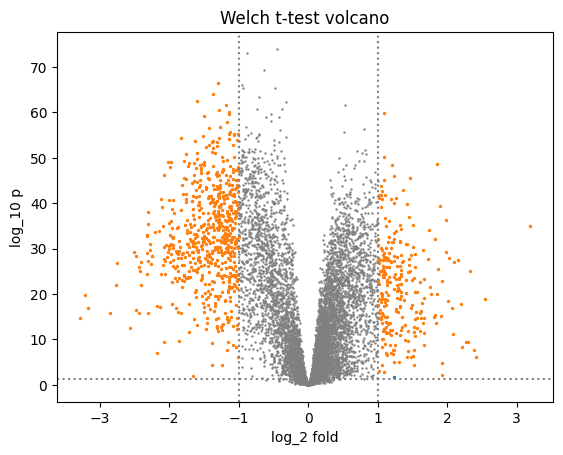

In [14]:
# Using volcano plot to select feature.
vol = Volcano_selection(k= -1, strategy = "p", log_domain=False, absolute= False)
vol_importance = vol.Select(
    x_copy, y)  # The number of features to select, and -1 means choose all.

# Plot the vlcano plot.
vol.plotting()

In [15]:
from PineBioML.selection.classification import ensemble_selector, Lasso_selection

In [16]:
# Use several way to select features, which includes decision tree, random forest, lasso, multi lasso, svm, adaboost, xgboost
selector = ensemble_selector(k = 100, z_importance_threshold=1)
importance = selector.Select(x, y)

Using  c45  to select.


100%|██████████| 9028/9028 [00:14<00:00, 621.37it/s]


c45  is done. Using 15.0530

Using  RF_gini  to select.
RF_gini  is done. Using 1.1046

Using  Lasso  to select.
Lasso  is done. Using 0.5143

Using  multi_Lasso  to select.
multi_Lasso  is done. Using 2.2776

Using  SVM  to select.
SVM  is done. Using 0.1949



In [17]:
Lasso = Lasso_selection(k=100)
Lasso.Select(x, y)

CMC1       1.000000
GPD1L      0.847090
NDUFA10    0.844469
NDUFS4     0.627655
SPTBN2     0.624210
             ...   
BTD        0.032775
PHGDH      0.032049
FBLN5      0.031909
LAMC3      0.031660
DHRS11     0.030360
Name: LassoLars, Length: 100, dtype: float64

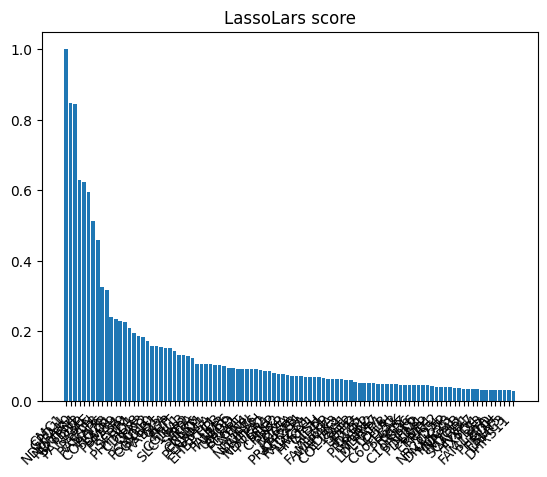

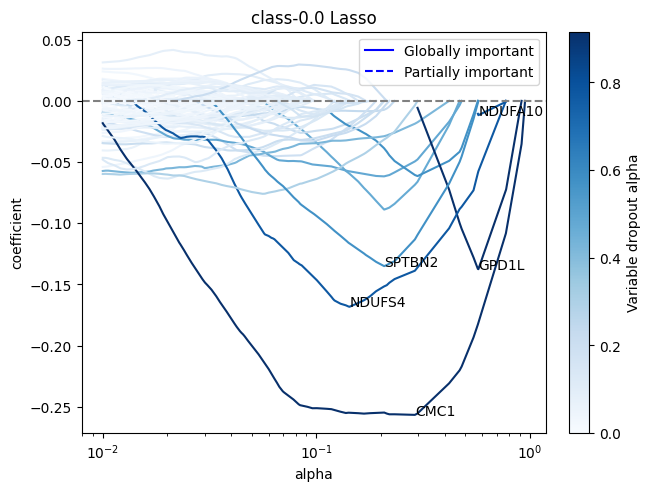

In [18]:
Lasso.Plotting()

In [19]:
# The feature importance given by diffirent methods.
# Please Notice that the score between diffirent methods is not comparable.
importance

,DT_score_c45,RandomForest_gini,LassoLars,multi_Lasso,SVM
CMC1,0.586538,0.010526,1.000000,0.866969,NaN
NDUFV1,0.586538,0.004424,NaN,0.866969,NaN
LLGL2,0.586538,0.006316,NaN,NaN,NaN
PFKP,0.585991,0.004226,0.077323,0.228645,NaN
ALDH4A1,0.581545,NaN,NaN,NaN,NaN
...,...,...,...,...,...
MOXD1,NaN,NaN,NaN,NaN,0.000321
TKT,NaN,NaN,NaN,NaN,0.000321
KLHL14,NaN,NaN,NaN,NaN,0.000321
PRPH,NaN,NaN,NaN,NaN,0.000321


# Analysis utils

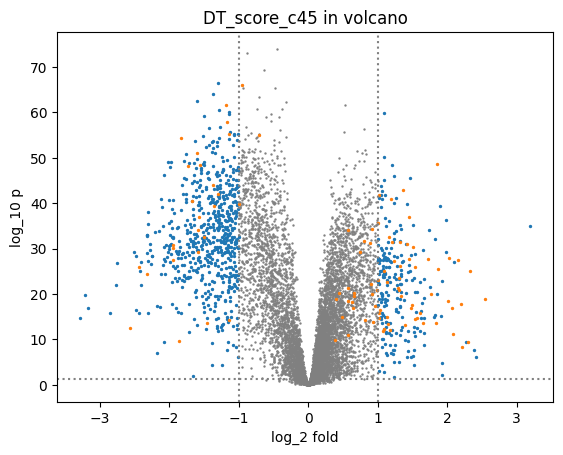

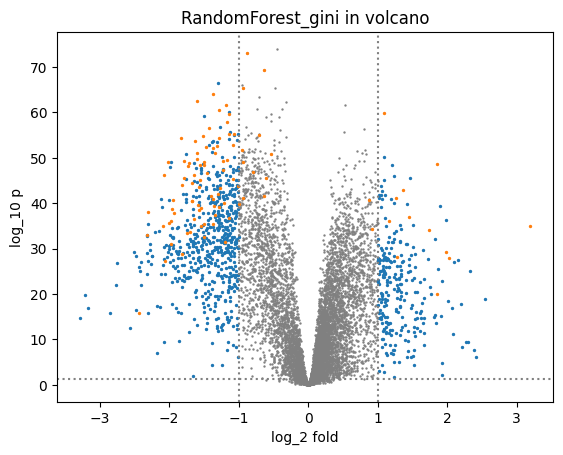

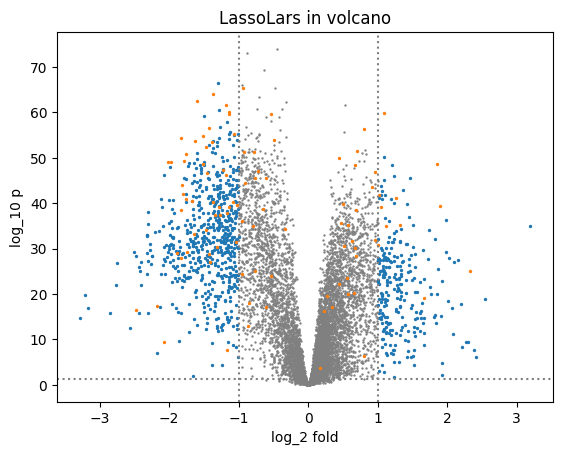

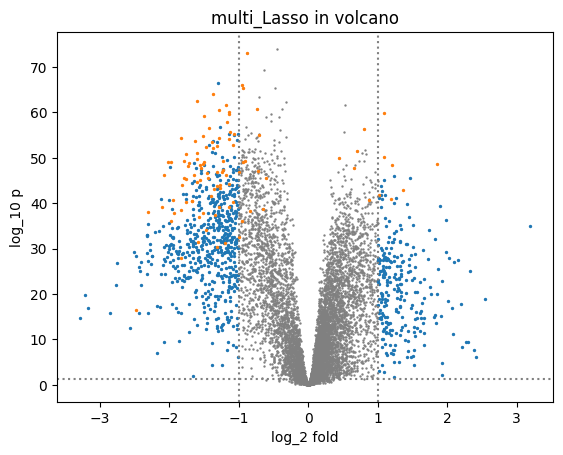

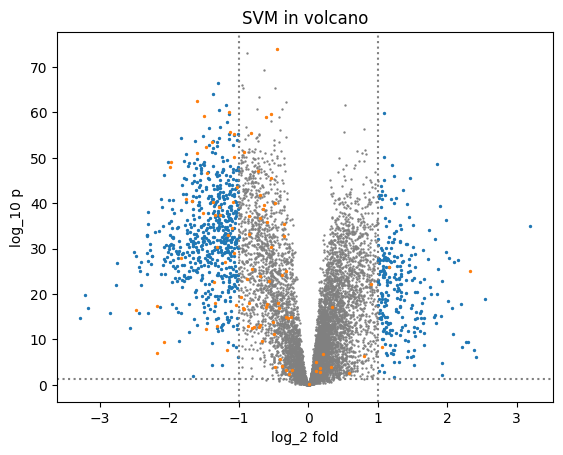

In [20]:
### Plot important features from diffirent methods on volcano plot.
for method in importance:
    vol.plotting(external=True,
                 external_score=importance[method].dropna(),
                 title=method + " in volcano",
                 show=False,
                 saving=True,
                 save_path="./output/images/" + export_title)

In [21]:
# Using g:profiler to do gene enrichment.
gp_enrichment_result = []
for method in importance.columns:
    gp_result = gp.profile(
        query=importance[method].dropna().index.to_list()).sort_values("p_value")
    gp_result["method"] = method
    gp_enrichment_result.append(gp_result[[
        "method", "source", "native", "parents", "p_value", "description",
        "intersection_size"
    ]])
gp_enrichment_result = pd.concat(gp_enrichment_result,
                                 axis=0).reset_index(drop=True)
# The result
gp_enrichment_result

,method,source,native,parents,p_value,description,intersection_size
0,DT_score_c45,GO:BP,GO:0044281,[GO:0008152],5.232241e-13,"""The chemical reactions and pathways involving...",37
1,DT_score_c45,GO:BP,GO:0006753,"[GO:0006796, GO:0019637, GO:0055086]",1.217245e-11,"""The chemical reactions and pathways involving...",23
2,DT_score_c45,GO:BP,GO:0006091,[GO:0008152],1.426220e-11,"""The chemical reactions and pathways resulting...",21
3,DT_score_c45,GO:BP,GO:0019752,[GO:0043436],2.703333e-11,"""The chemical reactions and pathways involving...",26
4,DT_score_c45,KEGG,KEGG:01100,[KEGG:00000],3.574282e-11,Metabolic pathways,39
...,...,...,...,...,...,...,...
746,SVM,GO:BP,GO:0022612,"[GO:0009887, GO:0048732]",4.415241e-02,"""The process in which the anatomical structure...",6
747,SVM,GO:BP,GO:0031589,[GO:0007155],4.559683e-02,"""The attachment of a cell to the underlying su...",9
748,SVM,GO:MF,GO:0030020,[GO:0005201],4.630059e-02,"""A constituent of the extracellular matrix tha...",4
749,SVM,TF,TF:M07040,[TF:M00000],4.751233e-02,Factor: GKLF; motif: NNRRGRRNGNSNNN,84


In [22]:
# Showing the top 10 significant result
gp_enrichment_result.sort_values("p_value").head(20)

,method,source,native,parents,p_value,description,intersection_size
160,RandomForest_gini,GO:BP,GO:0044281,[GO:0008152],4.593405e-26,"""The chemical reactions and pathways involving...",51
161,RandomForest_gini,GO:MF,GO:0008137,"[GO:0009055, GO:0015078, GO:0015453, GO:001665...",1.459452e-24,"""Catalysis of the reaction: NADH + ubiquinone ...",16
162,RandomForest_gini,GO:BP,GO:0009060,[GO:0045333],1.744873e-24,"""The enzymatic release of energy from inorgani...",24
163,RandomForest_gini,GO:MF,GO:0016655,[GO:0016651],7.507914e-24,"""Catalysis of an oxidation-reduction (redox) r...",17
164,RandomForest_gini,GO:BP,GO:0006091,[GO:0008152],2.658769e-23,"""The chemical reactions and pathways resulting...",31
165,RandomForest_gini,GO:CC,GO:0005739,"[GO:0005737, GO:0043231]",3.264276e-23,"""A semiautonomous, self replicating organelle ...",46
166,RandomForest_gini,GO:MF,GO:0015453,[GO:0015399],1.307690e-22,"""Primary active transport of a solute across a...",17
167,RandomForest_gini,GO:BP,GO:0006120,"[GO:0019646, GO:0042775]",1.448472e-22,"""The transfer of electrons from NADH to ubiqui...",16
461,multi_Lasso,GO:MF,GO:0008137,"[GO:0009055, GO:0015078, GO:0015453, GO:001665...",2.522613e-22,"""Catalysis of the reaction: NADH + ubiquinone ...",15
168,RandomForest_gini,GO:BP,GO:0045333,[GO:0015980],3.391947e-22,"""The enzymatic release of energy from inorgani...",24


# Modeling

In [ ]:
from PineBioML.model.supervised.Classification import SVM_tuner

In [24]:
svm = SVM_tuner().fit(selector.transform(x), y)
svm.plot()

optuna seed 7578  |  validation seed 11475  |  model seed 10210
    SVM start tuning. it will take a while.
    optuna is better, best trial:  3


# Output

In [27]:
# Save the result ro output_path
importance.to_csv(output_folder + export_title + " important feature.csv")
importance.to_csv(output_folder+export_title+ " importance.csv")
gp_enrichment_result.to_csv(output_folder+export_title+ " g_prophiler.csv")
vol_importance.to_csv(output_folder + export_title + " volcano_foldchange.csv")